K-NEAREST NEIGHBOR KLASIFIKASI

# LIBRARY YANG SAYA PERLUKAN

1.Numpy

2.Matplotlib untuk membuat grafik

3.Pandas

4.SKlearn

5.Itertools

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# DATASET
Saya mempunyai dataset, sejumlah 200 data

Dataset saya terbagi menjadi 8 kelas jurusan yaitu :
1. Desain Pemodelan dan Informasi Bangunan
2. Teknik Instalasi Tenaga Listrik
3. Teknik Pemesinan
4. Teknik Kendaraan Ringan
5. Teknik Sepeda Motor
6. Teknik Komputer dan Jaringan
7. Desain Komunikasi Visual
8. Perhotelan

In [ ]:
path_dataset = "/content/siswa.csv"

# DATA UNDERSTANDING

In [ ]:
df = pd.read_csv('siswa.csv')
df

,Matematika,IPA,IPS,Bahasa Inggris,Jurusan
0,98,88,74,67,PH
1,80,98,78,82,PH
2,70,70,83,95,TPM
3,99,83,62,81,DKV
4,61,83,89,97,TKJ
...,...,...,...,...,...
195,73,83,61,85,TITL
196,73,66,62,82,PH
197,77,97,94,74,TKJ
198,84,96,87,69,TKJ


In [ ]:
print("data shape : ", df.shape)

data shape :  (200, 5)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Matematika      200 non-null    int64 
 1   IPA             200 non-null    int64 
 2   IPS             200 non-null    int64 
 3   Bahasa Inggris  200 non-null    int64 
 4   Jurusan         200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Visualisasi dan Analisis Data

Menampilkan jumlah data per label

In [ ]:
df['Jurusan'].value_counts()

Jurusan
DKV     31
PH      30
TKJ     30
TITL    27
TSM     23
TPM     21
DPIB    21
TKR     17
Name: count, dtype: int64

In [ ]:
df.describe()

,Matematika,IPA,IPS,Bahasa Inggris
count,200.000000,200.000000,200.000000,200.000000
mean,79.980000,80.425000,80.075000,81.220000
std,11.703609,11.440226,12.325134,11.847507
min,60.000000,60.000000,60.000000,60.000000
25%,70.000000,71.750000,69.000000,71.000000
50%,80.500000,82.000000,81.000000,82.000000
75%,91.000000,89.250000,91.000000,91.250000
max,100.000000,100.000000,100.000000,100.000000


In [ ]:
df.Jurusan.value_counts()

Jurusan
DKV     31
PH      30
TKJ     30
TITL    27
TSM     23
TPM     21
DPIB    21
TKR     17
Name: count, dtype: int64

<Axes: xlabel='Jurusan', ylabel='Count'>

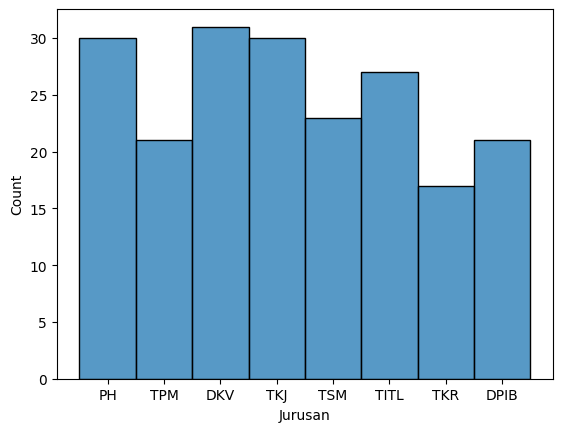

In [ ]:
import seaborn as sns
sns.histplot(df['Jurusan'])

# DATA CLEANING

In [ ]:
df.isnull().sum()

Matematika        0
IPA               0
IPS               0
Bahasa Inggris    0
Jurusan           0
dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

<ipython-input-45-58a1aebad3c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Jurusan', data=df, palette='flare')


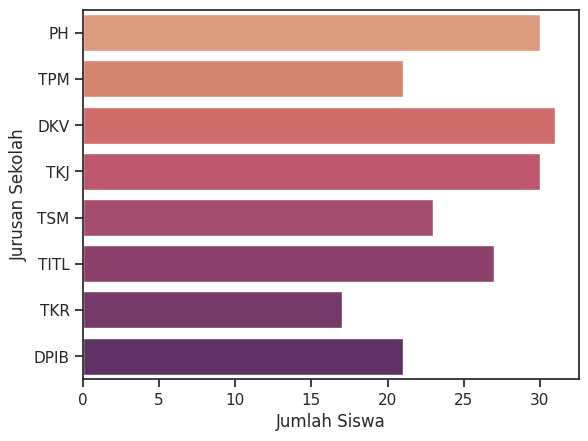

In [ ]:
import matplotlib.pyplot as plt
sns.set_theme(style='ticks')
sns.countplot(y='Jurusan', data=df, palette='flare')
plt.ylabel("Jurusan Sekolah")
plt.xlabel("Jumlah Siswa")
plt.show()

In [ ]:
df.head(20)

,Matematika,IPA,IPS,Bahasa Inggris,Jurusan
0,98,88,74,67,PH
1,80,98,78,82,PH
2,70,70,83,95,TPM
3,99,83,62,81,DKV
4,61,83,89,97,TKJ
5,61,80,92,71,TPM
6,81,84,86,87,TPM
7,75,74,62,96,TSM
8,66,80,68,98,TSM
9,77,63,84,73,DKV


# DATA PREPARATION

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Jurusan'] = label_encoder.fit_transform(df['Jurusan'])

In [ ]:
df.head()

,Matematika,IPA,IPS,Bahasa Inggris,Jurusan
0,98,88,74,67,2
1,80,98,78,82,2
2,70,70,83,95,6
3,99,83,62,81,0
4,61,83,89,97,4


Setelah melakukan perubahan tipe data.
Terjadi perubahan dari yang awalnya huruf menjadi angka, sebagai berikut:
perubahan nama jurusan ke code
0	= DKV
1	= DPIB
2	= PH
3 = TITL
4	= TKJ
5	= TSM
6	= TPM
7	= TKR


In [ ]:
x = df.drop(columns = ['Jurusan'])
y = df['Jurusan']

print("x : ", x.shape)
print("y : ", y.shape)

x :  (200, 4)
y :  (200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (160, 4)
y_train : (160,)
x_test : (40, 4)
y_test : (40,)


In [ ]:
scaler = preprocessing.MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# MODELING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_scaled, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         6
           5       0.05      1.00      0.10         2
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6

    accuracy                           0.05        40
   macro avg       0.01      0.12      0.01        40
weighted avg       0.00      0.05      0.00        40

Akurasi KNN : 5.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [ ]:
pred_coba = knn.predict(x_test_scaled)

In [ ]:
print("Jurusannya Adalah")
print(pred_coba)

Jurusannya Adalah
[2 4 3 3 7 0 6 4 0 0 5 3 6 3 5 0 3 5 5 0 6 3 4 4 2 2 2 0 1 5 5 2 3 7 3 0 3
 5 5 2]


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_coba))
print("Accuracy Score:")
print(accuracy_score(y_test, pred_coba))
print("Classification Report:")
print(classification_report(y_test, pred_coba))

Confusion Matrix:
[[1 0 0 1 0 1 2 0]
 [0 0 1 0 0 1 0 0]
 [2 0 1 1 0 2 0 0]
 [3 0 0 3 1 0 0 0]
 [0 1 1 2 1 0 0 1]
 [0 0 0 0 0 2 0 0]
 [1 0 1 0 1 2 1 0]
 [0 0 2 2 1 0 0 1]]
Accuracy Score:
0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.00      0.00      0.00         2
           2       0.17      0.17      0.17         6
           3       0.33      0.43      0.38         7
           4       0.25      0.17      0.20         6
           5       0.25      1.00      0.40         2
           6       0.33      0.17      0.22         6
           7       0.50      0.17      0.25         6

    accuracy                           0.25        40
   macro avg       0.25      0.29      0.22        40
weighted avg       0.28      0.25      0.23        40



In [ ]:
data_baru = pd.DataFrame({
	'Matematika': [87],
	'IPA' : [85],
	'IPS' : [75],
	'Bahasa Inggris' : [80]
})
data_baru = pd.DataFrame(data_baru)
data_baru

,Matematika,IPA,IPS,Bahasa Inggris
0,87,85,75,80


In [ ]:
data_baru_scaled = scaler.transform(data_baru)
prediksi_baru = knn.predict(data_baru_scaled)

In [ ]:
print("Jurusan yang sesuai adalah")
print(prediksi_baru)

Jurusan yang sesuai adalah
[3]


In [ ]:
if prediksi_baru == 0:
	jurusan_adalah = "Desain Komunikasi Visual"
elif prediksi_baru == 1:
	jurusan_adalah = "Desain Pemodelan dan Informasi Bangunan"
elif prediksi_baru == 2:
	jurusan_adalah = "Perhotelan"
elif prediksi_baru == 3:
	jurusan_adalah = "Teknik Instalasi Tenaga Listrik"
elif prediksi_baru == 4:
	jurusan_adalah = "Teknik Komputer dan Jaringan"
elif prediksi_baru == 5:
	jurusan_adalah = "Teknik Sepeda Motor"
elif prediksi_baru == 6:
	jurusan_adalah = "Teknik Pemesinan"
elif prediksi_baru == 7:
	jurusan_adalah = "Teknik Kendaraan Ringan"
else:
	jurusan_adalah = "Tidak ada Jurusan yang sesuai"
print("Jurusan yang sesuai untuk anda adalah:", jurusan_adalah)

Jurusan yang sesuai untuk anda adalah: Teknik Instalasi Tenaga Listrik


# Saving Model

In [ ]:
import pickle

filename = "jurusan_knn1.Model.sav"
pickle.dump(knn, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open('jurusan_knn1.Model.sav','rb'))